<a href="https://www.kaggle.com/code/hilalalpak/sorting-reviews-rating-product-amazon?scriptVersionId=182438168" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color: #ffffff; border-radius: 8px; background-color:#FF9900 ; padding: 8px; margin-bottom: 10px;"> 
    <p style="margin: 0; font-size: 30px; text-align: center; font-family: Arial, sans-serif; font-weight: bold; letter-spacing: 2px;"> Rating Product & Sorting Reviews </p> 
</div>

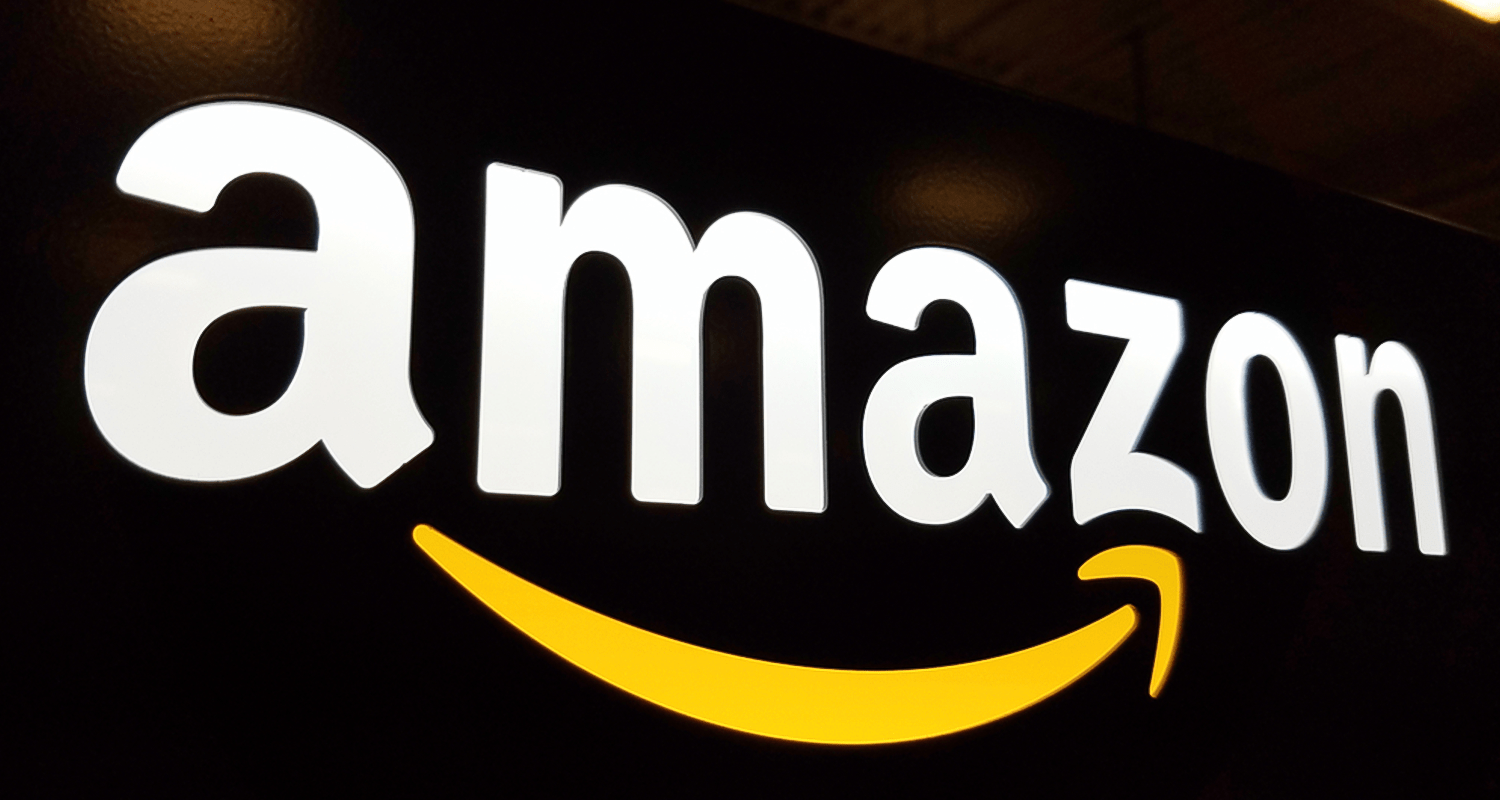


<div style="display:inline-block; text-align:left; margin-bottom:10px;">
    <div style="border: 2px solid #333333; border-radius: 5px; padding: 10px; margin-bottom: 10px; background-color:#232f3e;">
        <p style="font-weight:bold; color:white; margin:0; font-size: 150%;font-family: Arial, sans-serif"> BUSINESS PROBLEM </p>
        <p style="color:#ffffff; font-size: 110%; font-family: Arial, sans-serif; margin-top:5px;">The primary challenges in e-commerce include accurately assessing product ratings post-purchase and sorting product reviews effectively. Solving these issues is essential for enhancing customer satisfaction, increasing product visibility, and ensuring seamless shopping experiences. This, in turn, leads to sales growth for e-commerce platforms and sellers while facilitating smooth customer purchasing journeys.</p>
    </div>

<div style="display:inline-block; text-align:left; margin-bottom:10px;">
    <div style="border: 2px solid #333333; border-radius: 5px; padding: 10px; margin-bottom: 10px; background-color:#232f3e;">
        <p style="font-weight:bold; color:white; margin:0; font-size: 150%;font-family: Arial, sans-serif"> STORY OF THE DATASET </p>
        <p style="color:#ffffff; font-size: 110%; font-family: Arial, sans-serif; margin-top:5px;">This dataset containing Amazon product data includes various metadata along with product categories. In the Electronics category, there are user ratings and reviews for the product that has received the highest number of reviews.
</p>
    </div>
    

<div style="background-color:#FF9900; padding:10px; width: 350px; margin: auto;">
    <span style="font-weight:bold; color:black;">reviewerID:</span> <span style="color:black">User ID</span> <br>
    <span style="font-weight:bold; color:black;">asin:</span> <span style="color:black">Product ID</span> <br>
    <span style="font-weight:bold; color:black;">reviewerName:</span> <span style="color:black">User Name</span> <br>
    <span style="font-weight:bold; color:black;">helpful:</span> <span style="color:black">Helpful rating</span> <br>
    <span style="font-weight:bold; color:black;">reviewText:</span> <span style="color:black">Review</span> <br>
    <span style="font-weight:bold; color:black;">overall:</span> <span style="color:black">Product rating</span> <br>
    <span style="font-weight:bold; color:black;">summary:</span> <span style="color:black">Review summary</span> <br>
    <span style="font-weight:bold; color:black;">unixReviewTime:</span> <span style="color:black">Review time</span> <br>
    <span style="font-weight:bold; color:black;">reviewTime:</span> <span style="color:black">Review time Raw</span> <br>
    <span style="font-weight:bold; color:black;">day_diff:</span> <span style="color:black">Number of days since the review</span> <br>
    <span style="font-weight:bold; color:black;">helpful_yes:</span> <span style="color:black">Number of helpful votes for the review</span> <br>
    <span style="font-weight:bold; color:black;">total_vote:</span> <span style="color:black">Total number of votes for the review</span> <br>
</div>


In [1]:
# import Required Libraries

import pandas as pd
import math
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler
import sys
import numpy as np
import seaborn as sns
import warnings
import datetime as dt
import matplotlib.pyplot as plt

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Adjusting Row Column Settings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df = pd.read_csv("/kaggle/input/amazon-review-data/amazon_review.csv")

<div style="color: #ffffff; border-radius: 8px; background-color:#FF9900; padding: 8px; margin-bottom: 10px;"> 
    <p style="margin: 0; font-size: 20px; text-align: center; font-family: Arial, sans-serif; font-weight: bold; letter-spacing: 2px;"> Dataset Overview and Preparation </p> 
</div>

In [3]:
def check_df(dataframe, head=5):
    print("SHAPE".center(50,'*'))
    print(dataframe.shape)
    print("INFO".center(50,"*"))
    print(dataframe.info())
    print("MISSING VALUES".center(50,'*'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" UNIQUE VALUES ".center(70,'-'))
    print(dataframe.nunique())

check_df(df)

**********************SHAPE***********************
(4915, 12)
***********************INFO***********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB
None
******************MISSING VALUES******************
reviewerID        0
asin      

In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00000,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00000,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00000,best deal around,1373673600,2013-07-13,513,0,0


<div style="border: 2px solid #232f3e; border-radius: 5px; padding: 10px; margin-bottom: 10px; background-color:#232f3e; color:white; font-family: Amazon Ember, Arial, sans-serif;">
    <span style="font-weight:bold;">- </span> I will change the data type of the "reviewTime" variable as datetime. <br>
    <span style="font-weight:bold;">- </span> I will delete the "asin" variable since it has the same value for each row. <br>
    <span style="font-weight:bold;">- </span> Since I will use dates, I will delete the "unixReviewTime" variable.
</div>


In [5]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [6]:
df.drop(["asin", "unixReviewTime"], axis=1, inplace=True)

In [7]:
# I will determine the analysis date based on the date of the latest review. Then, I will reorganize the values in the day_diff variable.
current_date = df["reviewTime"].max()

df["day_diff"] = (current_date - df["reviewTime"]).dt.days

<div style="color: #ffffff; border-radius: 8px; background-color:#FF9900; padding: 8px; margin-bottom: 10px;"> 
    <p style="margin: 0; font-size: 20px; text-align: center; font-family: Arial, sans-serif; font-weight: bold; letter-spacing: 2px;"> Time based Weighted Average </p> 
</div>

In [8]:
df["day_diff"].quantile([.25, .5, .75]) 

0.25000   280.00000
0.50000   430.00000
0.75000   600.00000
Name: day_diff, dtype: float64

In [9]:
print("overall".center(50,'-'))
df["overall"].mean()

print("avg_280".center(50,'-'))
df.loc[(df["day_diff"] <= 280), "overall"].mean()

print("avg_280/430".center(50,'-'))
df.loc[(df["day_diff"] > 280) & (df["day_diff"] <= 430), "overall"].mean()

print("avg_430/600".center(50,'-'))
df.loc[(df["day_diff"] > 430) & (df["day_diff"] <= 600), "overall"].mean()

print("avg_600".center(50,'-'))
df.loc[df["day_diff"] > 600, "overall"].mean()

---------------------overall----------------------


4.587589013224822

---------------------avg_280----------------------


4.6957928802588995

-------------------avg_280/430--------------------


4.636140637775961

-------------------avg_430/600--------------------


4.571661237785016

---------------------avg_600----------------------


4.4462540716612375

In [10]:
def time_based_weighted_average(data, w1=28, w2=26, w3=24, w4=22):
    avg_280 = data.loc[(data["day_diff"] <= 280), "overall"].mean() *  w1 / 100
    avg_280_430 = data.loc[(data["day_diff"] > 280) & (data["day_diff"] <= 430), "overall"].mean() * w2 / 100
    avg_430_600 =data.loc[(data["day_diff"] > 430) & (data["day_diff"] <= 600), "overall"].mean() * w3 / 100
    avg_600 = data.loc[data["day_diff"] > 600, "overall"].mean() * w4 / 100
    overall = avg_280 + avg_280_430 + avg_430_600 + avg_600
    return avg_280, avg_280_430, avg_430_600, avg_600, overall

time_based_weighted_average(df)

(1.3148220064724918,
 1.2053965658217498,
 1.097198697068404,
 0.9781758957654723,
 4.595593165128118)

<div style="background-color: #232F3E; color: #FFFFFF; padding: 15px; border-radius: 5px;">
    <p>When we calculate the time-weighted average, we see that the average of the ratings given in the last five months has been consistently increasing. This indicates that the sellers may have made certain changes or improvements to the product.</p>
    <p>Calculating the average based on all times without considering this increase would not accurately reflect the results.</p>
</div>

In [11]:
df["helpful_no"] = df["total_vote"] - df["helpful_yes"]

In [12]:
def score_up_down_diff(up, down):
    return up - down

df["score_pos_neg_diff"] = score_up_down_diff(df["helpful_yes"], df["helpful_no"])

<div style="background-color: #232F3E; color: #FFFFFF; padding: 10px; border-radius: 5px;">
    <p>The method used above captures the number of comments but does not include ratio information. Therefore, it may contain bias.</p>

In [13]:
def score_average_rating(up, down):
    if (up + down).empty:
        return 0
    return up / (up + down)


df["score_average_rating"] = score_average_rating(df["helpful_yes"], df["helpful_no"])

<div style="background-color: #232F3E; color: #FFFFFF; padding: 10px; border-radius: 5px;">
    <p>The method we used above captures both the number of comments and the ratio information, however, it does not capture frequency information. Therefore, it is biased.</p>

<div style="color: #ffffff; border-radius: 8px; background-color:#FF9900; padding: 8px; margin-bottom: 10px;"> 
    <p style="margin: 0; font-size: 20px; text-align: center; font-family: Arial, sans-serif; font-weight: bold; letter-spacing: 2px;"> Wilson Lower Bound Score</p> 
</div>

In [14]:
def wilson_lower_bound(up, down, confidence=0.95):
    n = up + down
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * up / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + \
                                                    z * z / (4 * n)) / n)) / (1 + z * z / n)


df["wilson_lower_bound"] = df.apply(lambda x: wilson_lower_bound(x["helpful_yes"], x["helpful_no"]), axis=1)

<div style="background-color: #232F3E; color: #FFFFFF; padding: 10px; border-radius: 5px;">
    <p>We calculated the helpfulness score of the comments, thus eliminating the bias issue.</p>

In [15]:
df.sort_values("wilson_lower_bound", ascending=False).head(20)

,reviewerID,reviewerName,helpful,reviewText,overall,summary,reviewTime,day_diff,helpful_yes,total_vote,helpful_no,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,A12B7ZMXFI6IXY,"Hyoun Kim ""Faluzure""","[1952, 2020]",[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,5.00000,UPDATED - Great w/ Galaxy S4 & Galaxy Tab 4 10...,2013-01-05,701,1952,2020,68,1884,0.96634,0.95754
3449,AOEAD7DPLZE53,NLee the Engineer,"[1428, 1505]",I have tested dozens of SDHC and micro-SDHC ca...,5.00000,Top of the class among all (budget-priced) mic...,2012-09-26,802,1428,1505,77,1351,0.94884,0.93652
4212,AVBMZZAFEKO58,SkincareCEO,"[1568, 1694]",NOTE: please read the last update (scroll to ...,1.00000,1 Star reviews - Micro SDXC card unmounts itse...,2013-05-08,578,1568,1694,126,1442,0.92562,0.91214
317,A1ZQAQFYSXL5MQ,"Amazon Customer ""Kelly""","[422, 495]","If your card gets hot enough to be painful, it...",1.00000,"Warning, read this!",2012-02-09,1032,422,495,73,349,0.85253,0.81858
4672,A2DKQQIZ793AV5,Twister,"[45, 49]",Sandisk announcement of the first 128GB micro ...,5.00000,Super high capacity!!! Excellent price (on Am...,2014-07-03,157,45,49,4,41,0.91837,0.80811
1835,A1J6VSUM80UAF8,goconfigure,"[60, 68]",Bought from BestBuy online the day it was anno...,5.00000,I own it,2014-02-28,282,60,68,8,52,0.88235,0.78465
3981,A1K91XXQ6ZEBQR,"R. Sutton, Jr. ""RWSynergy""","[112, 139]",The last few days I have been diligently shopp...,5.00000,"Resolving confusion between ""Mobile Ultra"" and...",2012-10-22,776,112,139,27,85,0.80576,0.73214
3807,AFGRMORWY2QNX,R. Heisler,"[22, 25]",I bought this card to replace a lost 16 gig in...,3.00000,"Good buy for the money but wait, I had an issue!",2013-02-27,648,22,25,3,19,0.88000,0.70044
4306,AOHXKM5URSKAB,Stellar Eller,"[51, 65]","While I got this card as a ""deal of the day"" o...",5.00000,Awesome Card!,2012-09-06,822,51,65,14,37,0.78462,0.67033
4596,A1WTQUOQ4WG9AI,"Tom Henriksen ""Doggy Diner""","[82, 109]",Hi:I ordered two card and they arrived the nex...,1.00000,Designed incompatibility/Don't support SanDisk,2012-09-22,806,82,109,27,55,0.75229,0.66359
